<a href="https://colab.research.google.com/github/dee-ah-nuh/Stroke/blob/main/Stroke_Prediction_(Project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#***Importing Our Libraries***

> Pandas

> Numpy

> Seaborn

> Matplotlib

> Keras & Tensorflow

> Sci-kitLearn

> Plotly Express

In [ ]:
#Pandas, Numpy, Maplotly and Plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Seaborn
import seaborn as sns
from seaborn import heatmap
 
# Keras & TensorFlow
import tensorflow
from tensorflow import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics
 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error\
    , classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import matplotlib.cm as cm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as smote_pipe

#***Exploratory Data Analysis***

> Feature Engineering, Histograms, Boxplots, Distribution Plots, Pie Charts, etc

> Data Srangling

> NaN Values & Missing Values

> Dataset Overview



In [ ]:
stroke = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 - Stroke/healthcare-dataset-stroke-data.csv')
df = stroke
stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

1. Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


2. The Data includes statistics of patients who have had a stroke, stroke-like symptoms, and no stroke to determine weather we can predcit someone can have a stroke depending on the other features like bmi, height, weight, age, gender, diseases, etc...

3. Target = Stroke (or not)

4. Classification problem =  whether player has a stroke or not

5&6. There are around 12 features and around 8K rows of data

7. I belive that this dataset is the perfect balance between complex and simplistic allowing for easy predictions and modeling. 

In [ ]:
#getting a value of all NaN or Missing
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Getting all the duplicated values
stroke.duplicated().sum()

0

In [ ]:
#Checking the column 'bmi' because it was the only one contaning missing values
stroke['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [ ]:
#stroke.drop(stroke.loc[stroke['gender']== 'Other'].index, inplace=True)
#stroke = stroke[stroke.'gender' != 'Other']
stroke = stroke[stroke["gender"].str.contains("Other") == False]

In [ ]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
nominal_selector = stroke.select_dtypes( include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n')

gender
Female    2994
Male      2115
Name: gender, dtype: int64 

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 



In [ ]:
stroke['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [ ]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [ ]:
# searching for unusul value or replace them to be simple
def clean(df):
    df["smoking_status"]=df["smoking_status"].replace({
         "formerly smoked":"before",
        "never smoked":"never"
    })
    df["work_type"]=df["work_type"].replace({
        "children":"child",
        "Govt_jov":"gov",
        "Never_worked":"never",
        "Self-employed":"self",
        "Private":"private"
    })
    return df 

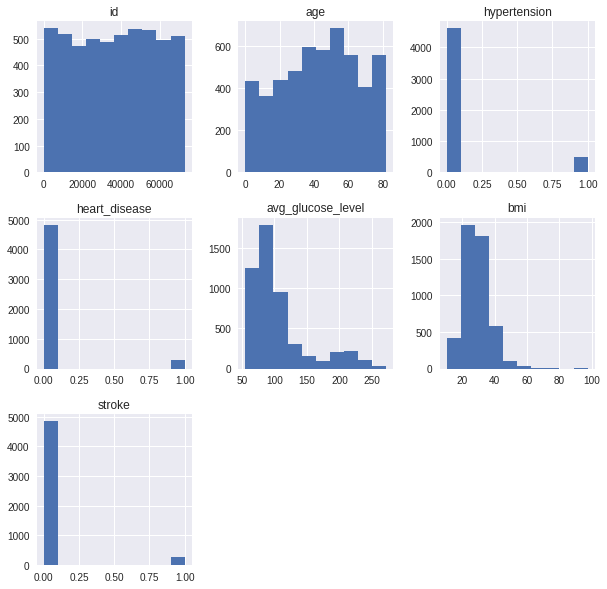

In [ ]:
Stroke_graph = stroke.hist(figsize = (10,10))

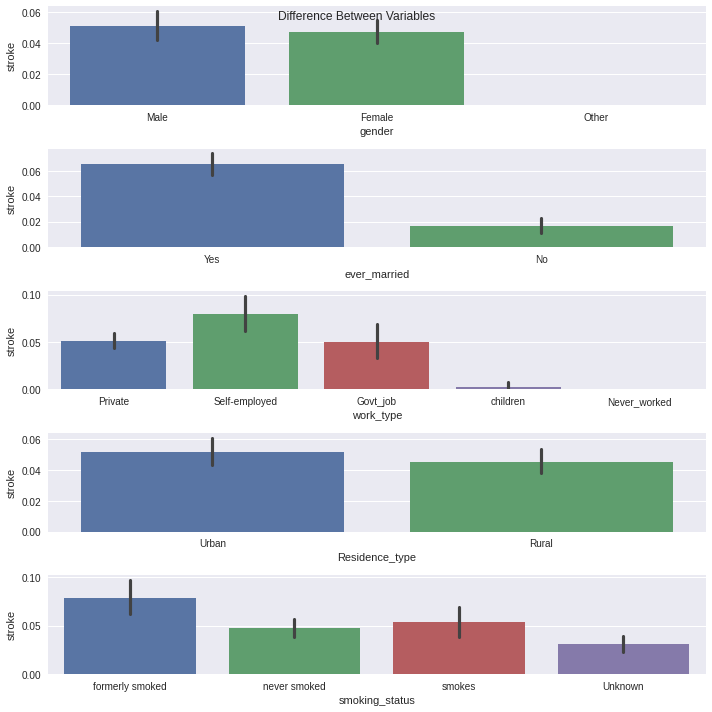

In [ ]:
f,axes=plt.subplots(nrows=5,ncols=1,figsize=(10,10))
f.suptitle("Difference Between Variables")
for i,value in enumerate(df.select_dtypes("object")):
    sns.barplot(x=value,y="stroke",data=df,ax=axes[i])
plt.tight_layout()

In [ ]:
def age_groups(age):
    if age >= 75:
        return('+75 ')
    elif age > 65:
        return('66 - 75 ')
    elif age > 55:
        return('56 - 65 ')
    elif age > 45:
        return('46 - 55 ')
    elif age > 35:
        return('36 - 45 ')
    elif age > 25:
        return('26 - 35 ')
    elif age > 18:
        return('19 - 25 ')
    elif age > 0:
        return('0 - 18 ')
    else:
        return(None)

In [ ]:
df['Age_group'] = df['age'].apply(age_groups)


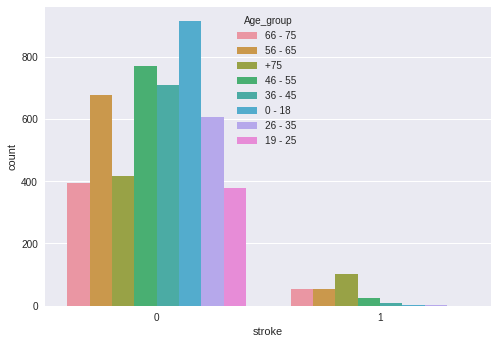

In [ ]:
sns.countplot(data=df,x='stroke',hue='Age_group')


Average Glucose level is one of the few abnormla distributions - this one is skewed to the right. BMI is also a histogram that poses a slight skew to the right. Stroke, Heart Disease and Hypertension are all bimodal since the columns are 

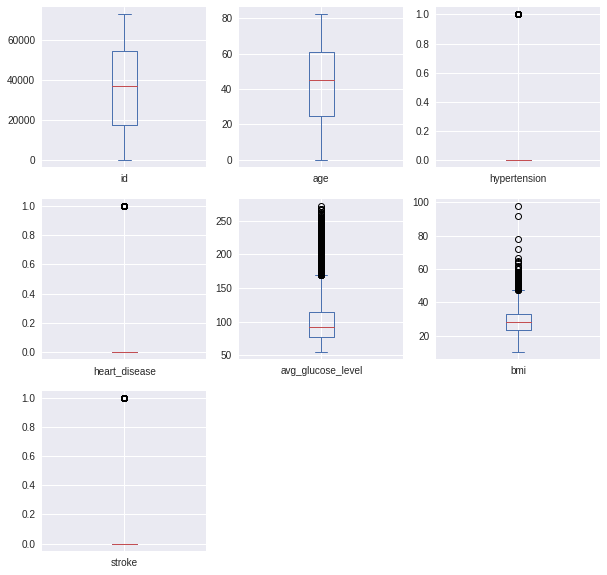

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
stroke.plot(kind='box',subplots=True ,layout=(3,3),sharex=False , sharey=False , figsize =(10,10))
plt.show()

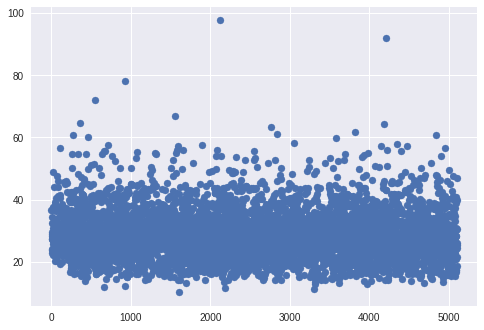

In [ ]:
plt.scatter(stroke.index, stroke['bmi'])
plt.show()

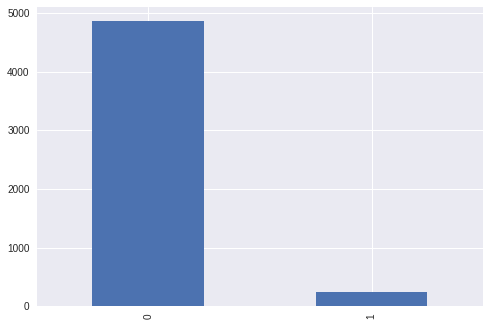

In [ ]:
stroke['stroke'].value_counts().plot(kind='bar')

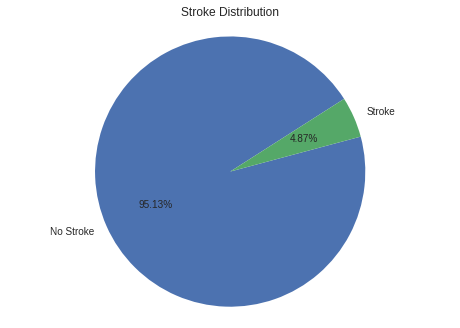

In [ ]:
stroke_answer = stroke['stroke'].value_counts()
stroke_label = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(stroke_answer, labels=stroke_label, autopct='%1.2f%%',
        shadow=False, startangle=15, counterclock=False,  wedgeprops = {'linewidth': 13})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Stroke Distribution')
plt.show()

In [ ]:
stroke_answer = stroke['stroke'].value_counts()
stroke_label = ['No Stroke','Stroke']

df1 = stroke.append(stroke_answer)
fig = px.pie(df1, values=stroke_answer, names=stroke_label, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

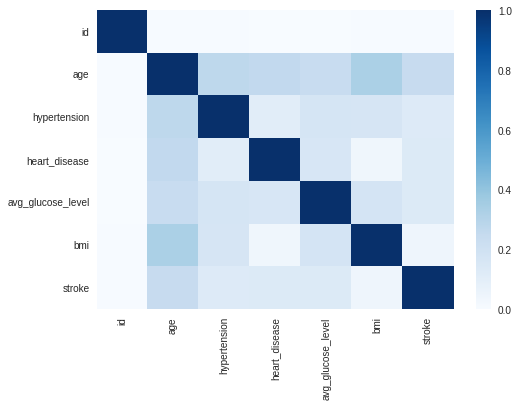

In [ ]:
#Creating a correlation map to show moderate to strong correlations between target features and other columns
corr = stroke.corr()
sns.heatmap(corr, cmap = 'Blues')

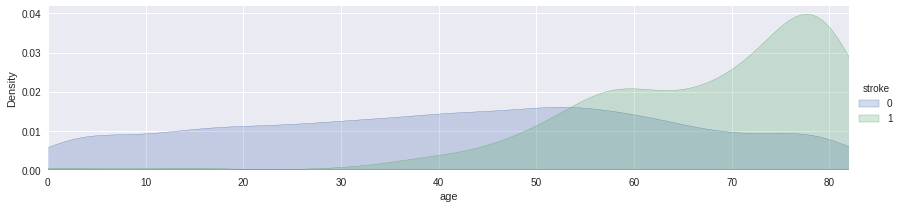

In [ ]:
fig = sns.FacetGrid(df, hue="stroke",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



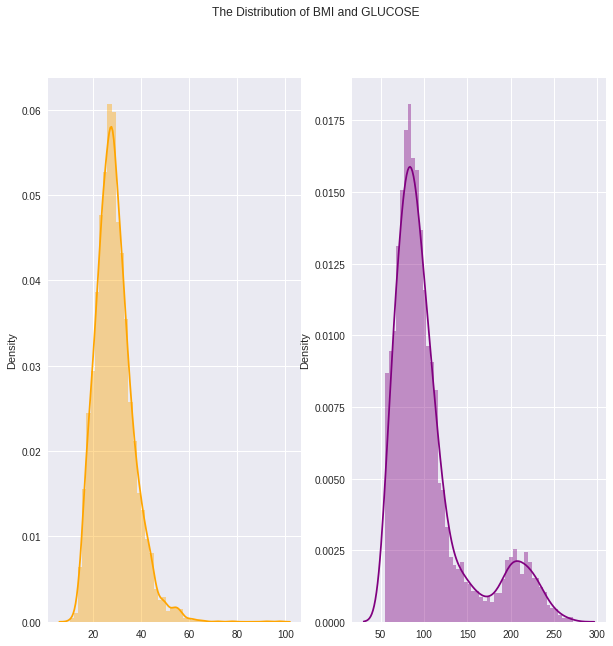

In [ ]:
f,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
f.suptitle("The Distribution of BMI and GLUCOSE ")
#sns.distplot(x=df["bmi"],color="red",ax=axes[0], label= "Distribution of BMI", rug=False, kde=True, norm_hist=False)

sns.distplot(x=df["bmi"],color="orange",ax=axes[0], label= "Distribution of BMI", rug=False, kde=True, norm_hist=True)

#sns.distplot(x=df["avg_glucose_level"],color="green",ax=axes[1], label= "Distribution of GLUCOSE", rug=False, kde=True, norm_hist=False)

sns.distplot(x=df["avg_glucose_level"],color="purple",ax=axes[1], label= "Distribution of GLUCOSE", rug=False, kde=True, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.



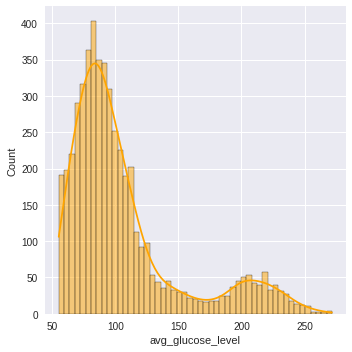

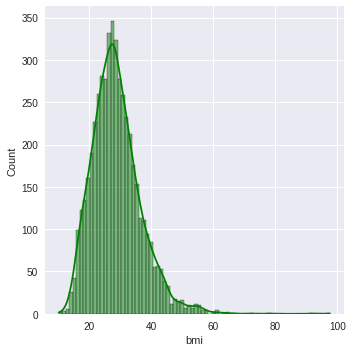

In [ ]:
sns.displot(x=df["avg_glucose_level"],color="orange",ax=axes[1], label= "Distribution of GLUCOSE", rug=False, kde=True)
sns.displot(x=df["bmi"],color="green",ax=axes[0], label= "Distribution of BMI", rug=False, kde=True)

In [ ]:
for i in df.drop(["stroke", "id"], axis=1).columns:
    fig = px.histogram(df, x=i, color='stroke',color_discrete_sequence={1: "royalblue", 0: 'lightgreen'},width=600, height=300 )
    fig.show(width=400, height=200)

In [ ]:
#Creating a filter to select all columns that are non-numerical so we can correct for inconsistencies
nominal_selector = stroke.select_dtypes(include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n');

gender
Female    2994
Male      2115
Name: gender, dtype: int64 

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 



In [ ]:
nominal_selector = stroke.select_dtypes(include='number')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].describe(), '\n');

id
count     5109.000000
mean     36513.985516
std      21162.008804
min         67.000000
25%      17740.000000
50%      36922.000000
75%      54643.000000
max      72940.000000
Name: id, dtype: float64 

age
count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 

hypertension
count    5109.000000
mean        0.097475
std         0.296633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64 

heart_disease
count    5109.000000
mean        0.054022
std         0.226084
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64 

avg_glucose_level
count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       11

#***Validation Split - Classification Problem***

> Split Data

> Employ and initiate transofrmers

> Employ and Initialize our Pipeline

> Fit eveything into a column transoformer 
 
> Preprocess data before Modeling

In [ ]:
#Assigning and splitting target column to X and y with random state of 42

In [550]:
X=stroke.drop(columns='stroke')
y = stroke['stroke']
labels=['No Stroke', 'Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
nominal_selector = make_column_selector(dtype_include='object')
numeric_selector = make_column_selector(dtype_include='number')

In [ ]:
#Creating our imputer for later inputing them into our preprocessor and pipeline

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [ ]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)

In [ ]:
nominal_tup = (nominal_pipeline, (['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))
numeric_tup = (numeric_pipeline, numeric_selector)

In [ ]:
preprocessor = make_column_transformer(numeric_tup, nominal_tup, remainder='passthrough')

In [ ]:
preprocessor.fit(X_train);

The number of people who have suffered from stroke are very minimal compared to those who have had a stroke. 

In [ ]:
stroke["age"].nunique()

104

In [ ]:
#Creating a function to evaluate metrics towards prediction

def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
    
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
#  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
      #                          display_labels=classes,
   #                             normalize=normalize)
 # plt.grid(False)
  plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


#***KMeans Clustering***

> Clustering based on three features 

> BMI, AGE, GLUCOSE

> Scale X

> Choose the best # of Clusters based on Interia plot and 

In [ ]:
#Clustering 
df.dropna(inplace=True)
x = df[['age','avg_glucose_level', 'bmi']]

x.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
5,81.0,186.21,29.0


In [ ]:
x.describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
scaled_x = StandardScaler().fit_transform(x)
scaled_x[:5]

array([[ 1.07013796,  2.77769839,  0.98134488],
       [ 1.64656262,  0.0138418 ,  0.45926914],
       [ 0.27201152,  1.48413156,  0.70120668],
       [ 1.60222226,  1.54919261, -0.62308299],
       [ 1.69090297,  1.82136844,  0.01359474]])

In [ ]:
ks = range(2,10)
inertia = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(scaled_x)
  inertia.append(model.inertia_)

Text(0, 0.5, 'inertias')

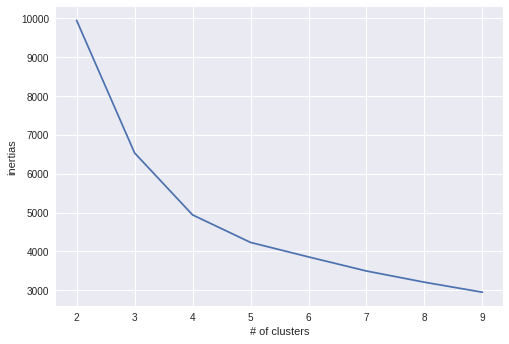

In [ ]:
plt.plot(ks, inertia)
plt.xlabel('# of clusters')
plt.ylabel('inertias')

In [ ]:
ks = range(2,10)
sills = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(scaled_x)
  sills.append(silhouette_score(scaled_x, model.labels_))

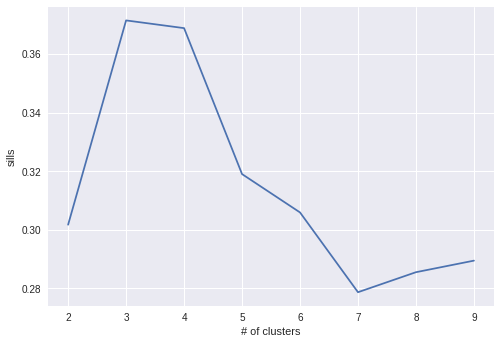

In [ ]:
plt.plot(ks, sills)
plt.xlabel('# of clusters')
plt.ylabel('sills')
plt.show()

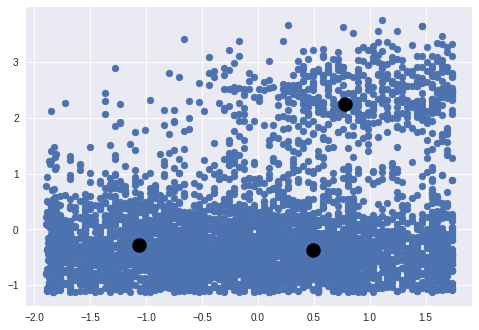

In [ ]:
#opitmal ~ 3 
best_model = KMeans(n_clusters=3, random_state=42)
y_preds = best_model.fit(scaled_x)
plt.scatter(scaled_x[:,0], 
            scaled_x[:,1])
plt.scatter(best_model.cluster_centers_[:, 0], 
            best_model.cluster_centers_[:, 1], 
            s=200,                             
            # Set centroid size
            c='black')                           
            # Set centroid color
plt.show()

In this graph we can see the centroids and the various clusteres mapped upon age, bmi and average glucose level. We can see in the Elbow and the Intertia plot that the highest and optimal number of cluster to groups the people in tihs dataset was 3 as represented inn the scatterplot above. 

In [ ]:
cluster_df = df.copy()
cluster_df['cluster'] = best_model.labels_
cluster_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,66 - 75,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,+75,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,46 - 55,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,+75,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,+75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0 - 18,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,+75,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,26 - 35,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,46 - 55,0


In [ ]:
cluster_groups = cluster_df.groupby('cluster', as_index=False)
cluster_mean = cluster_groups.mean()
print(cluster_mean)


   cluster            id        age  hypertension  heart_disease  \
0        0  38781.955836  60.525237      0.257098       0.143533   
1        1  36502.014961  18.822334      0.001795       0.001197   
2        2  37006.946237  53.994240      0.109447       0.057604   

   avg_glucose_level        bmi    stroke  
0         204.947808  33.424132  0.123028  
1          92.752711  22.702813  0.001795  
2          89.099958  31.762519  0.049155  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f405d062610>,
      dtype=object)

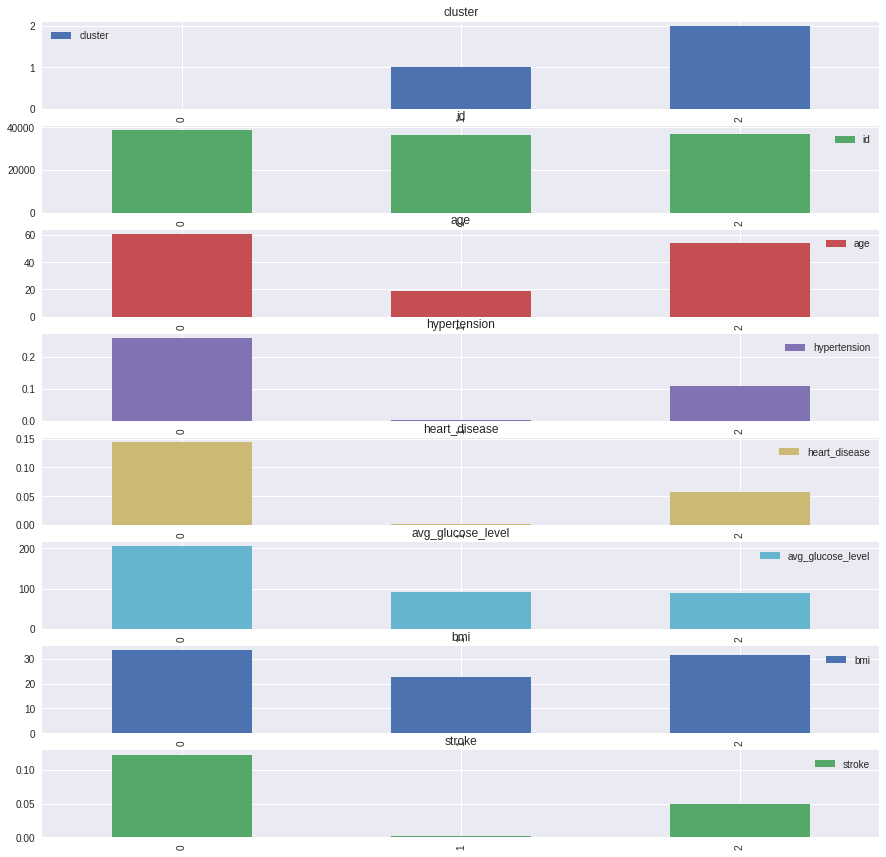

In [ ]:
cluster_mean.plot(subplots=True, kind='bar', figsize= (15, 15), sharex=False)

#***SMOTE & Class imbalance***

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.957425
1    0.042575
Name: stroke, dtype: float64

In [ ]:
y_train.value_counts()

0    3662
1     169
Name: stroke, dtype: int64

In [ ]:
Xtest_proc = preprocessor.transform(X_test)
Xtrain_proc = preprocessor.transform(X_train)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(Xtrain_proc, y_train)

In [ ]:
y_train_smote.value_counts()

0    3662
1    3662
Name: stroke, dtype: int64

#***Modeling***
  
> Logistic Regression

> Bagging Classifier

> Decision Tree Classifier

> XGBClassifier

> LGBM Classifier

&

> GradientBoostingClassifier

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train);

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




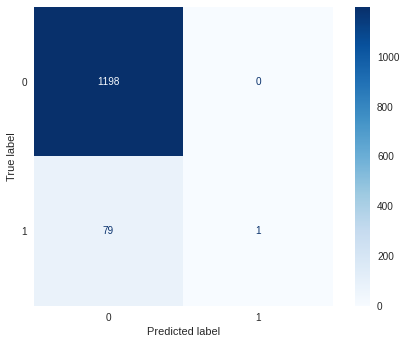

In [ ]:
evaluate_classification(logreg_pipe, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test, cmap = 'Blues', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

In [ ]:
print(f'Training Score:', logreg_pipe.score(X_train, y_train))
print(f' Testing Score:', logreg_pipe.score(X_test, y_test))

Training Score: 0.9558861915948839
 Testing Score: 0.9381846635367762


In [ ]:
#L1 Tunning
c_valuesl1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scoresl1 = []
test_scoresl1 = []
for c in c_valuesl1: 
  logregl1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logregl1_pipe = make_pipeline(preprocessor, logregl1)
  logregl1_pipe.fit(X_train, y_train)
  train_scoresl1.append(logregl1_pipe.score(X_train, y_train))
  test_scoresl1.append(logregl1_pipe.score(X_test, y_test))
{c:score for c, score in zip(c_valuesl1, test_scoresl1)}

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_valuesl1, train_scoresl1, label='Training Accuracy')
ax.plot(c_valuesl1, test_scoresl1, label='Testing Accuracy')
ax.set_xticks(c_valuesl1)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

In [ ]:
#L2 Tunning
c_values2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []
for c in c_values2: 
  logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg_l2_pipe = make_pipeline(preprocessor, logreg_l2)
  logreg_l2_pipe.fit(X_train, y_train)

  train_scores2.append(logreg_l2_pipe.score(X_train, y_train))
  test_scores2.append(logreg_l2_pipe.score(X_test, y_test))

{c:score for c, score in zip(c_values2, test_scores2)}

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values2, train_scores2, label='Training Accuracy')
ax.plot(c_values2, test_scores2, label='Testing Accuracy')
ax.set_xticks(c_values2)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

In [ ]:
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'm...

Logistic Regression with l1 Tunning

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




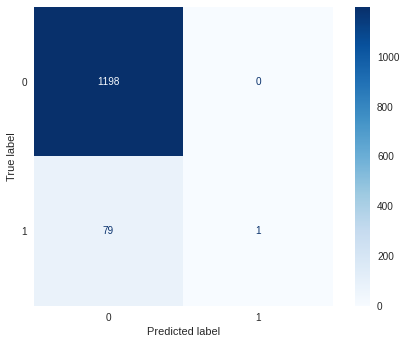

In [ ]:
logregl1_final = LogisticRegression(C=1000, max_iter=1000, solver='liblinear', penalty='l1')
logregl1_final_pipe = make_pipeline(preprocessor, logregl1)
logregl1_final_pipe.fit(X_train, y_train);
evaluate_classification(logregl1_final_pipe, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(logregl1_final_pipe, X_test, y_test, cmap = 'Blues', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Balancing Logistic Regressor for L1

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.16      0.72      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.80      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




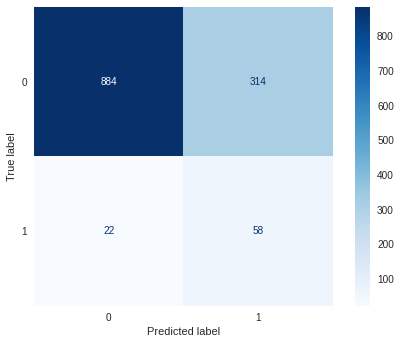

In [ ]:
logreg_balanced = LogisticRegression(C=1000, solver = "liblinear", class_weight='balanced', max_iter=1000, penalty = 'l1')
logreg_balanced_pipe = make_pipeline(preprocessor, scaler, logreg_balanced)
logreg_balanced_pipe.fit(X_train, y_train)

evaluate_classification(logreg_balanced_pipe, X_test, y_test)

ConfusionMatrixDisplay.from_estimator(logreg_balanced_pipe, X_test, y_test, cmap = 'Blues', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Logistic Regression L2 Regularization

In [ ]:
C=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
for i in C:                                             # 1st change
    logisticl2 = LogisticRegression(penalty='l2',C=i)
    logisticl2_pipe = make_pipeline(preprocessor, logisticl2)   # 2nd change
    logisticl2_pipe.fit(X_train,y_train)
    probs = logisticl2_pipe.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.16      0.72      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.80      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




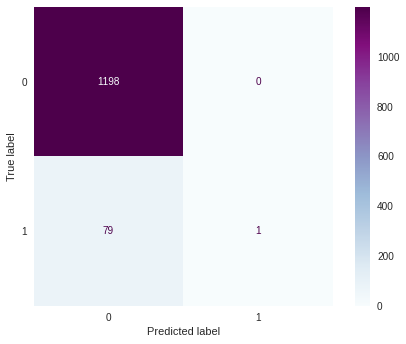

In [ ]:
evaluate_classification(logreg_balanced_pipe, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(logisticl2_pipe, X_test, y_test, cmap = 'BuPu', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.16      0.72      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.80      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




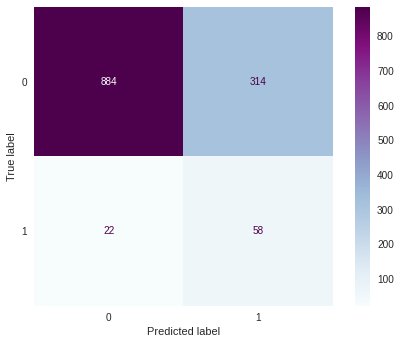

In [ ]:
logisticl2_balanced = LogisticRegression(C=1000, solver = "liblinear", class_weight='balanced', max_iter=1000, penalty = 'l2')
logisticl2_balanced_pipe = make_pipeline(preprocessor, scaler, logisticl2_balanced)
logisticl2_balanced_pipe.fit(X_train, y_train)

evaluate_classification(logreg_balanced_pipe, X_test, y_test)

ConfusionMatrixDisplay.from_estimator(logreg_balanced_pipe, X_test, y_test, cmap = 'BuPu', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1198
           1       0.16      0.71      0.26        80

    accuracy                           0.75      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.75      0.81      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




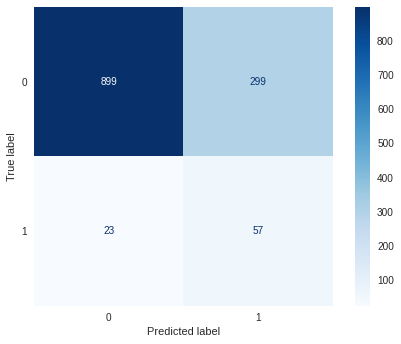

In [ ]:
logreg_smote = LogisticRegression(C=1000, solver = "liblinear", class_weight='balanced', max_iter=1000, penalty = 'l1')
logreg_smote_pipe = smote_pipe(scaler, smote, logreg_smote)

logreg_smote_pipe.fit(Xtrain_proc, y_train)

evaluate_classification(logreg_smote_pipe, Xtest_proc, y_test)

ConfusionMatrixDisplay.from_estimator(logreg_smote_pipe, Xtest_proc, y_test, cmap = 'Blues', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1198
           1       0.16      0.72      0.26        80

    accuracy                           0.75      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.93      0.75      0.81      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




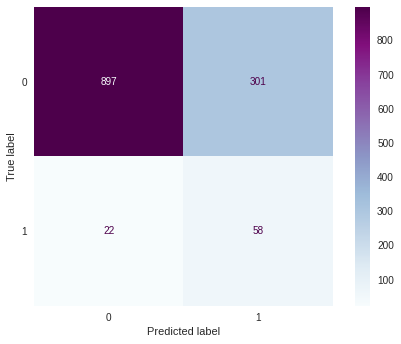

In [ ]:
logreg2_smote = LogisticRegression(C=1000, solver = "liblinear", class_weight='balanced', max_iter=1000, penalty = 'l2')
logreg2_smote_pipe = smote_pipe(scaler, smote, logreg_smote)

logreg2_smote_pipe.fit(Xtrain_proc, y_train)

evaluate_classification(logreg2_smote_pipe, Xtest_proc, y_test)

ConfusionMatrixDisplay.from_estimator(logreg2_smote_pipe, Xtest_proc, y_test, cmap = 'BuPu', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Logistic Regression with l2 Tunning

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




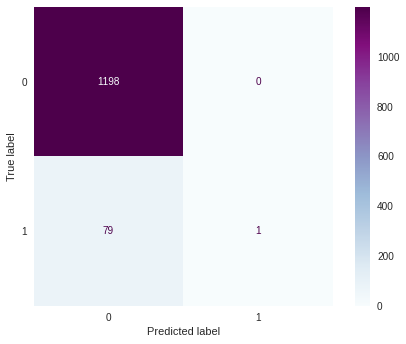

In [ ]:
logreg_l2_final = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty='l2', class_weight='balanced')
logreg_l2_final_pipe = make_pipeline(preprocessor, logreg)
logreg_l2_final_pipe.fit(X_train, y_train);

evaluate_classification(logreg_l2_final_pipe, X_test, y_test)

ConfusionMatrixDisplay.from_estimator(logreg_l2_final_pipe, X_test, y_test, cmap = 'BuPu', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Bagging Classifier

In [ ]:
bc = BaggingClassifier()
bc_pipe = make_pipeline(preprocessor, bc)
bc_pipe.fit(X_train, y_train);

In [ ]:
bc_train_score = bc_pipe.score(X_train, y_train)
bc_test_score = bc_pipe.score(X_test, y_test)
print(bc_train_score)
print(bc_test_score)

0.9926912033411642
0.9311424100156495


In [ ]:
bc_acc_score = bc_pipe.score(X_test, y_test)
bc_acc_score

0.9311424100156495

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.25      0.05      0.08        80

    accuracy                           0.93      1278
   macro avg       0.59      0.52      0.52      1278
weighted avg       0.90      0.93      0.91      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




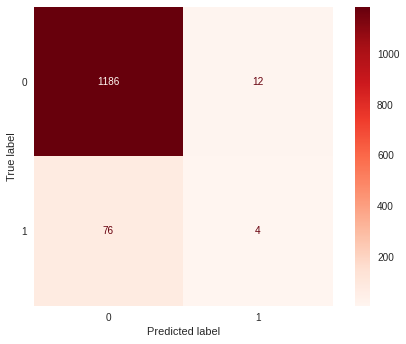

In [ ]:
evaluate_classification(bc_pipe, X_test, y_test)

ConfusionMatrixDisplay.from_estimator(bc_pipe, X_test, y_test, cmap = 'Reds', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1198
           1       0.10      0.09      0.09        80

    accuracy                           0.89      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.89      0.89      0.89      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




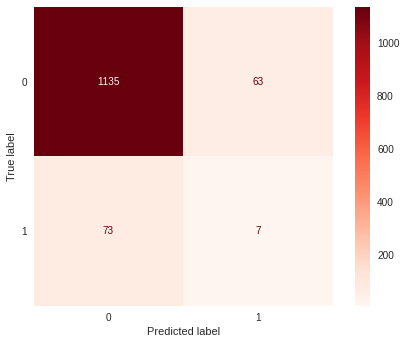

In [ ]:
bc_smote = BaggingClassifier()
bc_smote = smote_pipe(scaler, smote, bc_smote)
bc_smote.fit(Xtrain_proc, y_train)

evaluate_classification(bc_smote, Xtest_proc, y_test)

ConfusionMatrixDisplay.from_estimator(bc_smote, Xtest_proc, y_test, cmap = 'Reds', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier()
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train);

In [ ]:
dec_train_score = dec_tree_pipe.score(X_train, y_train)
dec_test_score = dec_tree_pipe.score(X_test, y_test)
print(dec_train_score)
print(dec_test_score)

1.0
0.8967136150234741


In [ ]:
dec_acc_score = dec_tree_pipe.score(X_test, y_test)
dec_acc_score

0.8967136150234741

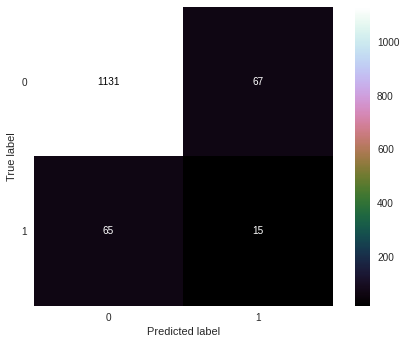

In [ ]:
ConfusionMatrixDisplay.from_estimator(dec_tree_pipe, X_test, y_test, cmap = 'cubehelix', display_labels=labels);
plt.grid(False)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1198
           1       0.12      0.16      0.14        80

    accuracy                           0.88      1278
   macro avg       0.53      0.54      0.54      1278
weighted avg       0.89      0.88      0.88      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




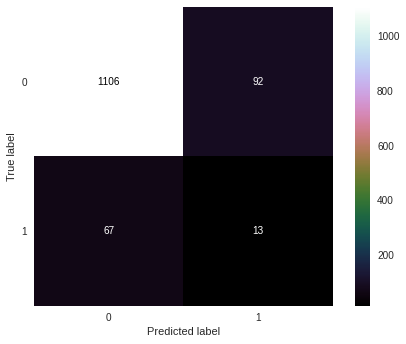

In [ ]:
dec_smote = DecisionTreeClassifier()
dec_smote = smote_pipe(scaler, smote, dec_smote)
dec_smote.fit(Xtrain_proc, y_train)

evaluate_classification(dec_smote, Xtest_proc, y_test)

ConfusionMatrixDisplay.from_estimator(dec_smote, Xtest_proc, y_test, cmap = 'cubehelix', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier()
gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train);

In [ ]:
print('Training accuracy:', gbc_pipe.score(X_train, y_train))
print('Testing accuracy:', gbc_pipe.score(X_test, y_test))

Training accuracy: 0.9634560167058209
Testing accuracy: 0.9366197183098591


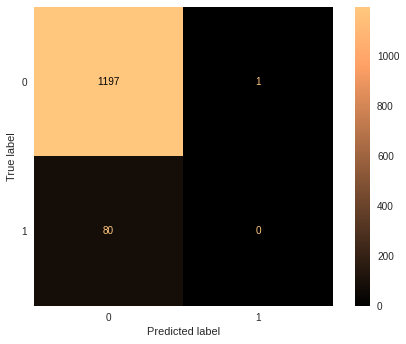

In [ ]:
ConfusionMatrixDisplay.from_estimator(gbc_pipe, X_test, y_test, cmap = 'copper', display_labels=labels);
plt.grid(False)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1198
           1       0.17      0.41      0.24        80

    accuracy                           0.84      1278
   macro avg       0.57      0.64      0.58      1278
weighted avg       0.91      0.84      0.87      1278



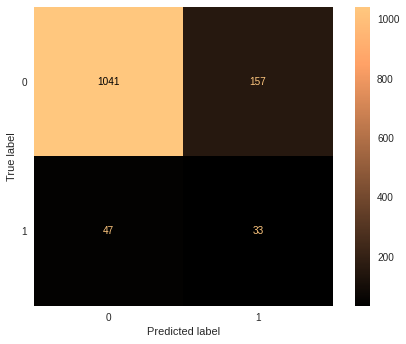

In [ ]:
gbc_smote = GradientBoostingClassifier()
gbc_smote = smote_pipe(scaler, smote, gbc_smote)
gbc_smote.fit(Xtrain_proc, y_train)

evaluate_classification(gbc_smote, Xtest_proc, y_test)


ConfusionMatrixDisplay.from_estimator(gbc_smote, Xtest_proc, y_test, cmap = 'copper', display_labels=labels);
plt.grid(False)

LGBM Classifier

Training accuracy: 0.9994779430957974
Testing accuracy: 0.9327073552425665


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.20      0.03      0.04        80

    accuracy                           0.93      1278
   macro avg       0.57      0.51      0.50      1278
weighted avg       0.89      0.93      0.91      1278



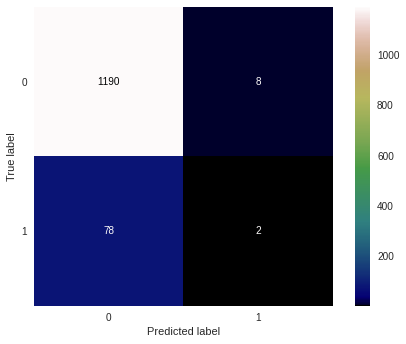

In [ ]:
lgbm = LGBMClassifier()
lgbm_pipe=make_pipeline(preprocessor, lgbm)
lgbm_pipe.fit(X_train, y_train)

print('Training accuracy:', lgbm_pipe.score(X_train, y_train))
print('Testing accuracy:', lgbm_pipe.score(X_test, y_test))
print("\n")
evaluate_classification(lgbm_pipe, X_test, y_test)


ConfusionMatrixDisplay.from_estimator(lgbm_pipe, X_test, y_test, cmap = 'gist_earth', display_labels=labels);
plt.grid(False)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1198
           1       0.17      0.09      0.12        80

    accuracy                           0.92      1278
   macro avg       0.56      0.53      0.54      1278
weighted avg       0.89      0.92      0.90      1278



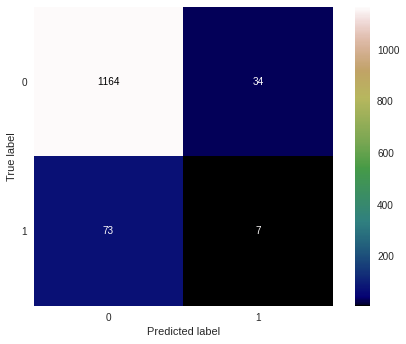

In [ ]:
lgbm_smote = LGBMClassifier()
lgbm_smote = smote_pipe(scaler, smote, lgbm)
lgbm_smote.fit(Xtrain_proc, y_train)

print('Training accuracy:', lgbm_pipe.score(X_train, y_train))
print('Testing accuracy:', lgbm_pipe.score(X_test, y_test))
print("\n")

evaluate_classification(lgbm_smote, Xtest_proc, y_test)


ConfusionMatrixDisplay.from_estimator(lgbm_smote, Xtest_proc, y_test, cmap = 'gist_earth', display_labels=labels);
plt.grid(False)

XGB Classifier

Training accuracy: 0.9564082484990865
Testing accuracy: 0.9374021909233177


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



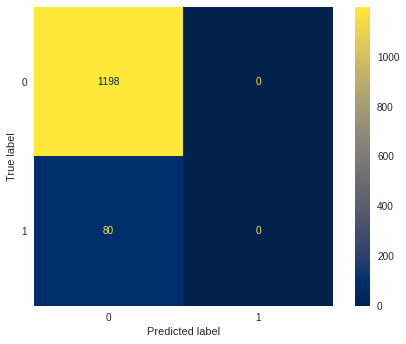

In [ ]:
xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)

print('Training accuracy:', xgb_pipe.score(X_train, y_train))
print('Testing accuracy:', xgb_pipe.score(X_test, y_test))
print('\n')
ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_test, y_test, cmap = 'cividis', display_labels=labels);
plt.grid(False)

evaluate_classification(xgb_pipe, X_test, y_test)

Training accuracy: 0.8715740015661707
Testing accuracy: 0.8356807511737089


              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1198
           1       0.17      0.44      0.25        80

    accuracy                           0.84      1278
   macro avg       0.57      0.65      0.58      1278
weighted avg       0.91      0.84      0.87      1278



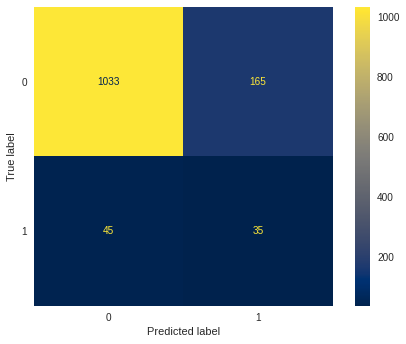

In [534]:
xgb = XGBClassifier()
xgb_smotepipe = smote_pipe(scaler, smote, xgb_smote)
xgb_smotepipe.fit(Xtrain_proc, y_train)

print('Training accuracy:', xgb_smotepipe.score(Xtrain_proc, y_train))
print('Testing accuracy:', xgb_smotepipe.score(Xtest_proc, y_test))
print("\n")

evaluate_classification(xgb_smotepipe, Xtest_proc, y_test)


ConfusionMatrixDisplay.from_estimator(xgb_smotepipe, Xtest_proc, y_test, cmap = 'cividis', display_labels=labels);
plt.grid(False)

#***Final Model Selection***

> Logistic Regression with l2 Tunning, SMOTE and Class_weight= 'Balanced' & with a Threshold of 0.28

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1198
           1       0.16      0.71      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.81      1278

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right




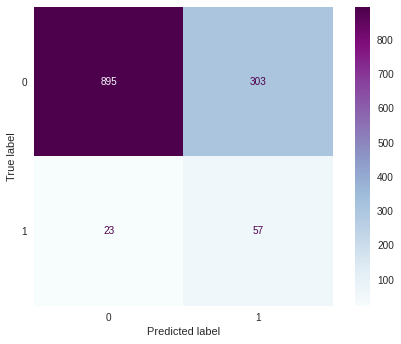

In [536]:
logreg2_smote = LogisticRegression(C=1000, solver = "liblinear", class_weight='balanced', max_iter=1000, penalty = 'l2')
logreg2_smote_pipe = smote_pipe(scaler, smote, logreg_smote)

logreg2_smote_pipe.fit(Xtrain_proc, y_train)

evaluate_classification(logreg2_smote_pipe, Xtest_proc, y_test)

ConfusionMatrixDisplay.from_estimator(logreg2_smote_pipe, Xtest_proc, y_test, cmap = 'BuPu', display_labels=labels);
plt.grid(False)
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n")

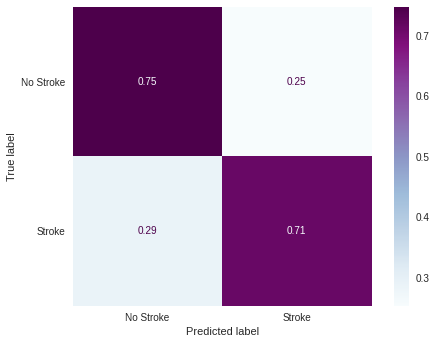

In [556]:
ConfusionMatrixDisplay.from_estimator(logreg2_smote_pipe, Xtest_proc, y_test, cmap = 'BuPu', normalize='true',display_labels=labels);
plt.grid(False)

In [558]:
train_preds = logreg2_smote_pipe.predict(Xtrain_proc)
test_preds = logreg2_smote_pipe.predict(Xtest_proc)
print(train_preds[:5])
print('\n')
print(test_preds[-5:])
print('\n')
test_probs = logreg2_smote_pipe.predict_proba(Xtest_proc)
print(test_probs[:5])

[0 0 0 0 0]


[0 0 0 0 0]


[[0.96740307 0.03259693]
 [0.94697972 0.05302028]
 [0.69906013 0.30093987]
 [0.15163326 0.84836674]
 [0.29701205 0.70298795]]


In [559]:
#test_probs = logreg2_smote_pipe.predict(Xtest_proc)
#test_probs[-5:]

In [560]:
#train_probs = logreg2_smote_pipe.predict_proba(Xtrain_proc)
#train_probs[:5]

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1198
           1       0.16      0.71      0.26        80

    accuracy                           0.74      1278
   macro avg       0.57      0.73      0.55      1278
weighted avg       0.92      0.74      0.81      1278



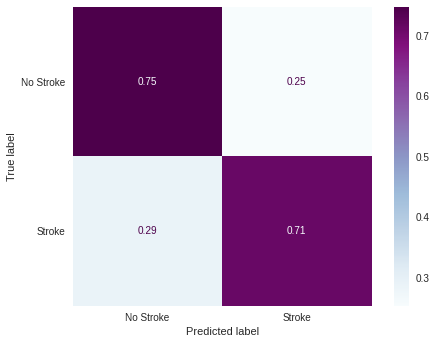

In [561]:
labels=['No Stroke', 'Stroke']
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', display_labels=labels, cmap='BuPu')
print(classification_report(y_test, test_preds))
plt.grid(False)

Changing the Threshold

In [592]:
thresh = .09
test_thresh = [1 if x[1] >= thresh else 0 for x in test_probs]
test_thresh[-5:]


[1, 0, 1, 1, 0]

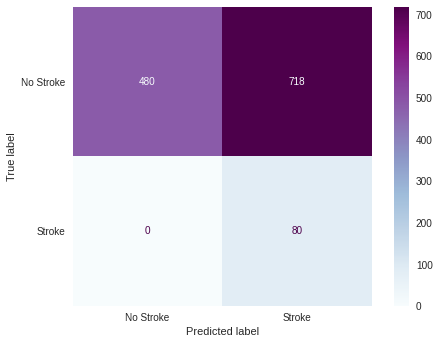

In [593]:
thresh = .09
test_thresh = [1 if x[1] >= thresh else 0 for x in test_probs]
test_thresh[-5:]

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, display_labels=labels, cmap='BuPu')
plt.grid(False)

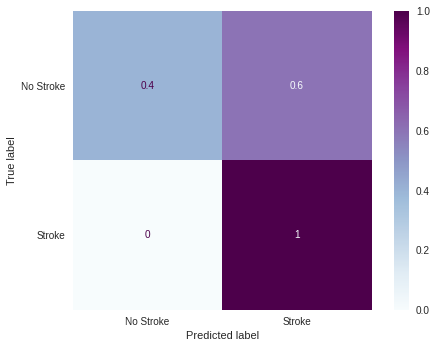

In [595]:
thresh = .09
test_thresh = [1 if x[1] >= thresh else 0 for x in test_probs]
test_thresh[-5:]

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, normalize='true',display_labels=labels, cmap='BuPu')
plt.grid(False)